# FAKE News Prediction

# 1. import libaries

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import re
import seaborn as sns
import string

In [2]:
data_fake = pd.read_csv("/home/bolt/jupyter files/CSV files/Fake.csv")
data_true = pd.read_csv("/home/bolt/jupyter files/CSV files/True.csv")

# 2. EDA

In [3]:
data_true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [4]:
data_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [5]:
data_true.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


In [6]:
data_fake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


# 3. Create target variables(labels)

In [7]:
data_fake["class"] = 0
data_true["class"] = 1

# 4. Data Visualization

In [8]:
from tqdm import tqdm   # progress bar
import nltk
from nltk.corpus import stopwords

In [9]:
def preprocess_text(text_data):
    preprocessed_text = []
      
    for sentence in tqdm(text_data):
        sentence = re.sub(r'[^\w\s]', '', sentence)
        preprocessed_text.append(' '.join(token.lower()
                                  for token in str(sentence).split()
                                  if token not in stopwords.words('english')))
    return preprocessed_text

In [10]:
# only_true = data.iloc[:,:].where(data['class']==1).dropna()
# only_true.head()

In [11]:
# preprocessed_reviewt = preprocess_text(only_true['text'].values)
# only_true['text'] = preprocessed_reviewt

In [12]:
# only_true['text'].to_csv('preprocessed_true.csv')
datatrue = pd.read_csv('preprocessed_true.csv')

In [13]:
# only_fake = data.iloc[:,:].where(data['class']==0).dropna()
# only_fake.head()

In [14]:
# preprocessed_reviewf = preprocess_text(only_fake['text'].values)
# only_fake['text'] = preprocessed_reviewf

In [15]:
# only_fake['text'].to_csv('preprocessed_fake.csv')
datafake = pd.read_csv('preprocessed_fake.csv')

In [16]:
datatrue

,Unnamed: 0,text
0,0,reuters former u vice presidential nominee sar...
1,1,tokyo reuters japan propose changes safeguard ...
2,2,new york ifr jared kushner divested equity int...
3,4,new york reuters proposal driven president don...
4,7,brussels reuters eu brexit negotiator michel b...
...,...,...
21412,44890,baghdad reuters iraqi prime minister haider al...
21413,44891,washington reuters u secretary state rex tille...
21414,44892,danang vietnam reuters moscow receiving contra...
21415,44896,washington reuters u secretary state rex tille...


## i) .Word Cloud to find most frequently used words in TRUE News.

In [18]:
from wordcloud import WordCloud

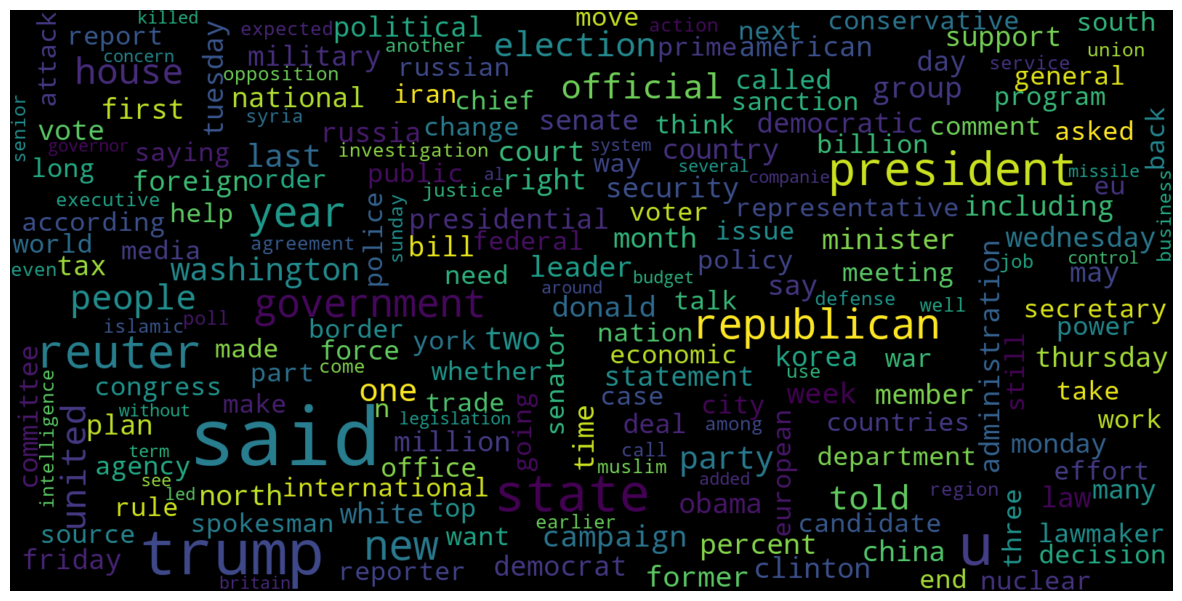

In [19]:
# True
consolidated = ' '.join(word for word in datatrue['text'].astype(str))

wordcloud = WordCloud(width=1600,
                      height=800,
                      random_state=21,
                      max_font_size=110,
                      collocations=False)
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud.generate(consolidated), interpolation='bilinear')
plt.axis('off')
plt.show()

## ii). Word Cloud to find most frequently used words in FAKE News

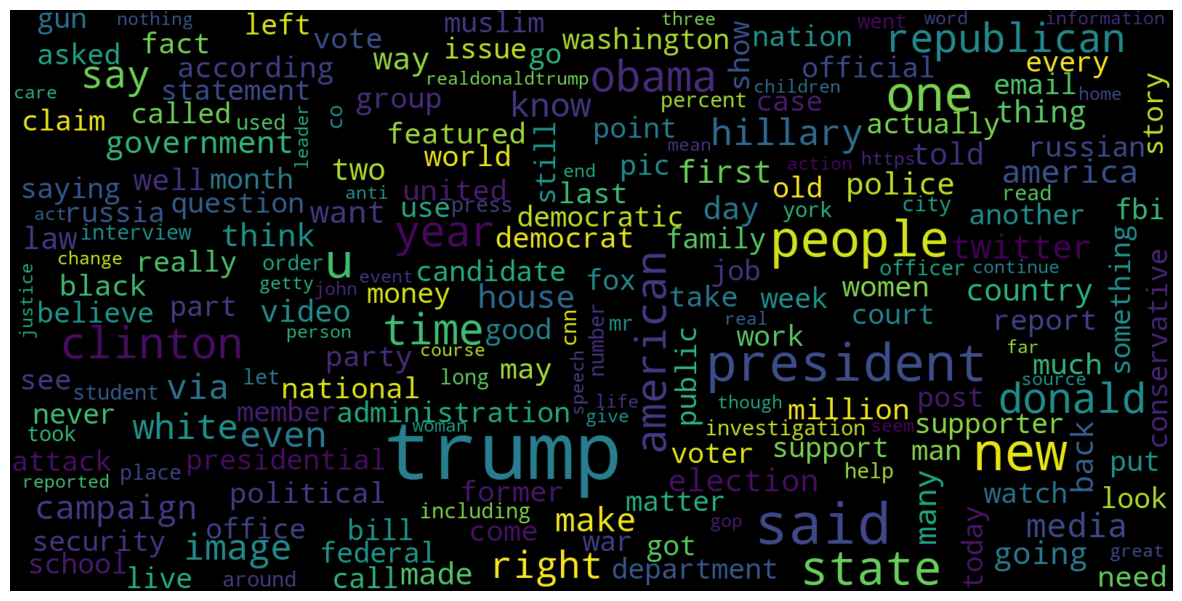

In [20]:
# Fake
consolidated = ' '.join(word for word in datafake['text'].astype(str))

wordcloud = WordCloud(width=1600,
                      height=800,
                      random_state=21,
                      max_font_size=110,
                      collocations=False)

plt.figure(figsize=(15, 10))
plt.imshow(wordcloud.generate(consolidated), interpolation='bilinear')
plt.axis('off')
plt.show()

## iii) Bar plot for TRUE News

In [21]:
from sklearn.feature_extraction.text import CountVectorizer
  
def get_top_n_words(corpus, n):
    vec = CountVectorizer()
    vec.fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx])
                  for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1],
                        reverse=True)
    return words_freq[0:n]
  
common_words = get_top_n_words(datatrue['text'].astype('str'), 20)
df1 = pd.DataFrame(common_words, columns=['Word', 'count'])


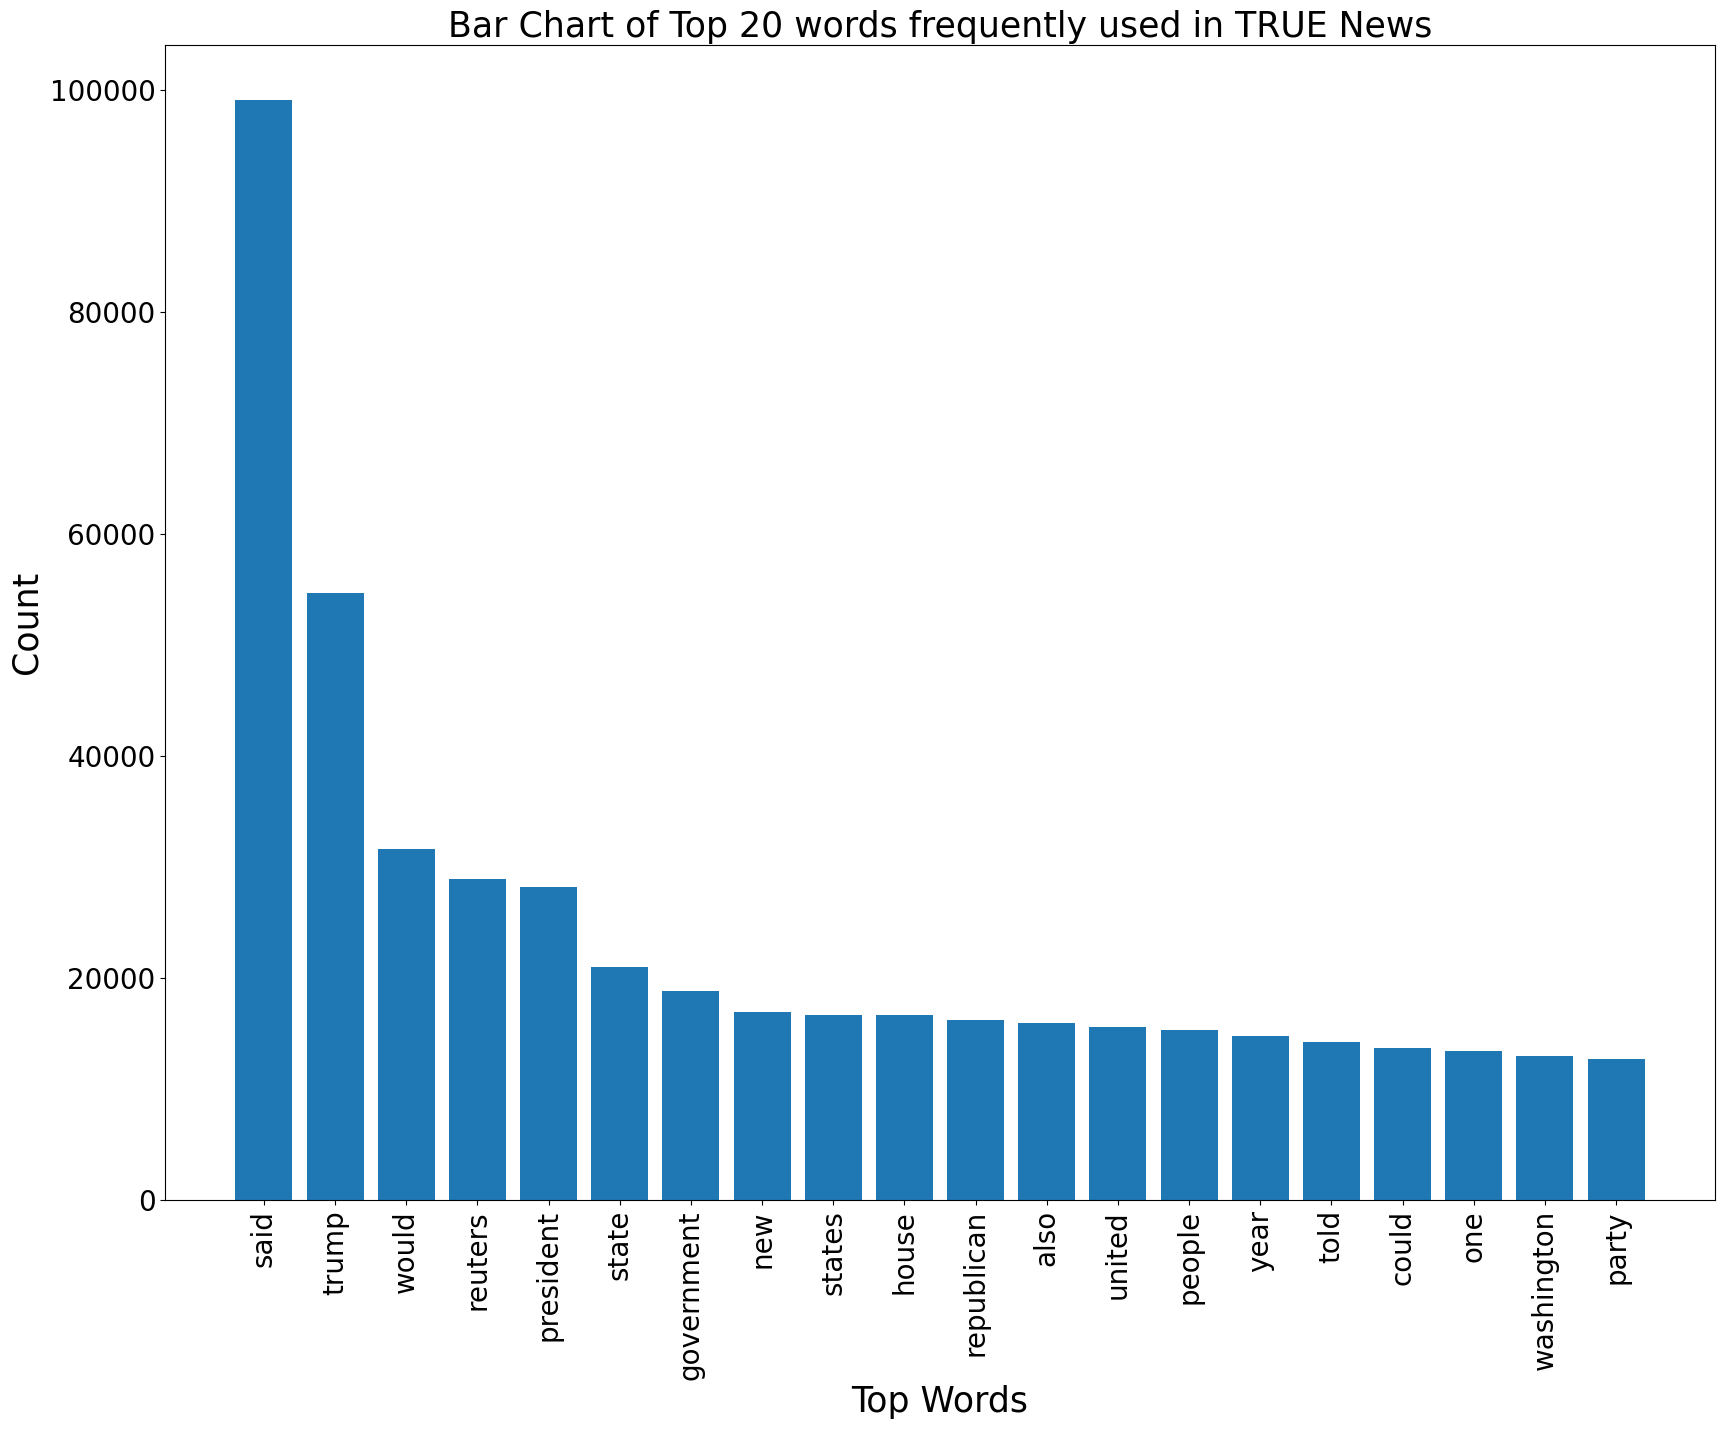

In [22]:
plt.figure(figsize = (20,15))
plt.bar(df1['Word'],df1['count'] )

plt.title("Bar Chart of Top 20 words frequently used in TRUE News",fontsize=25)

plt.xlabel("Top Words",fontsize=25) 
plt.ylabel("Count",fontsize=25) 

plt.xticks(fontsize=20,rotation=90)
plt.yticks(fontsize=20)

plt.show()

## iv) Bar plot for FAKE News

In [23]:
from sklearn.feature_extraction.text import CountVectorizer
  
def get_top_n_words(corpus, n):
    vec = CountVectorizer().fit(corpus)  
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx])
                  for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1],
                        reverse=True)
    return words_freq[0:n]
  
common_words = get_top_n_words(datafake['text'].astype('str'), 20)
df1 = pd.DataFrame(common_words, columns=['Word', 'count'])

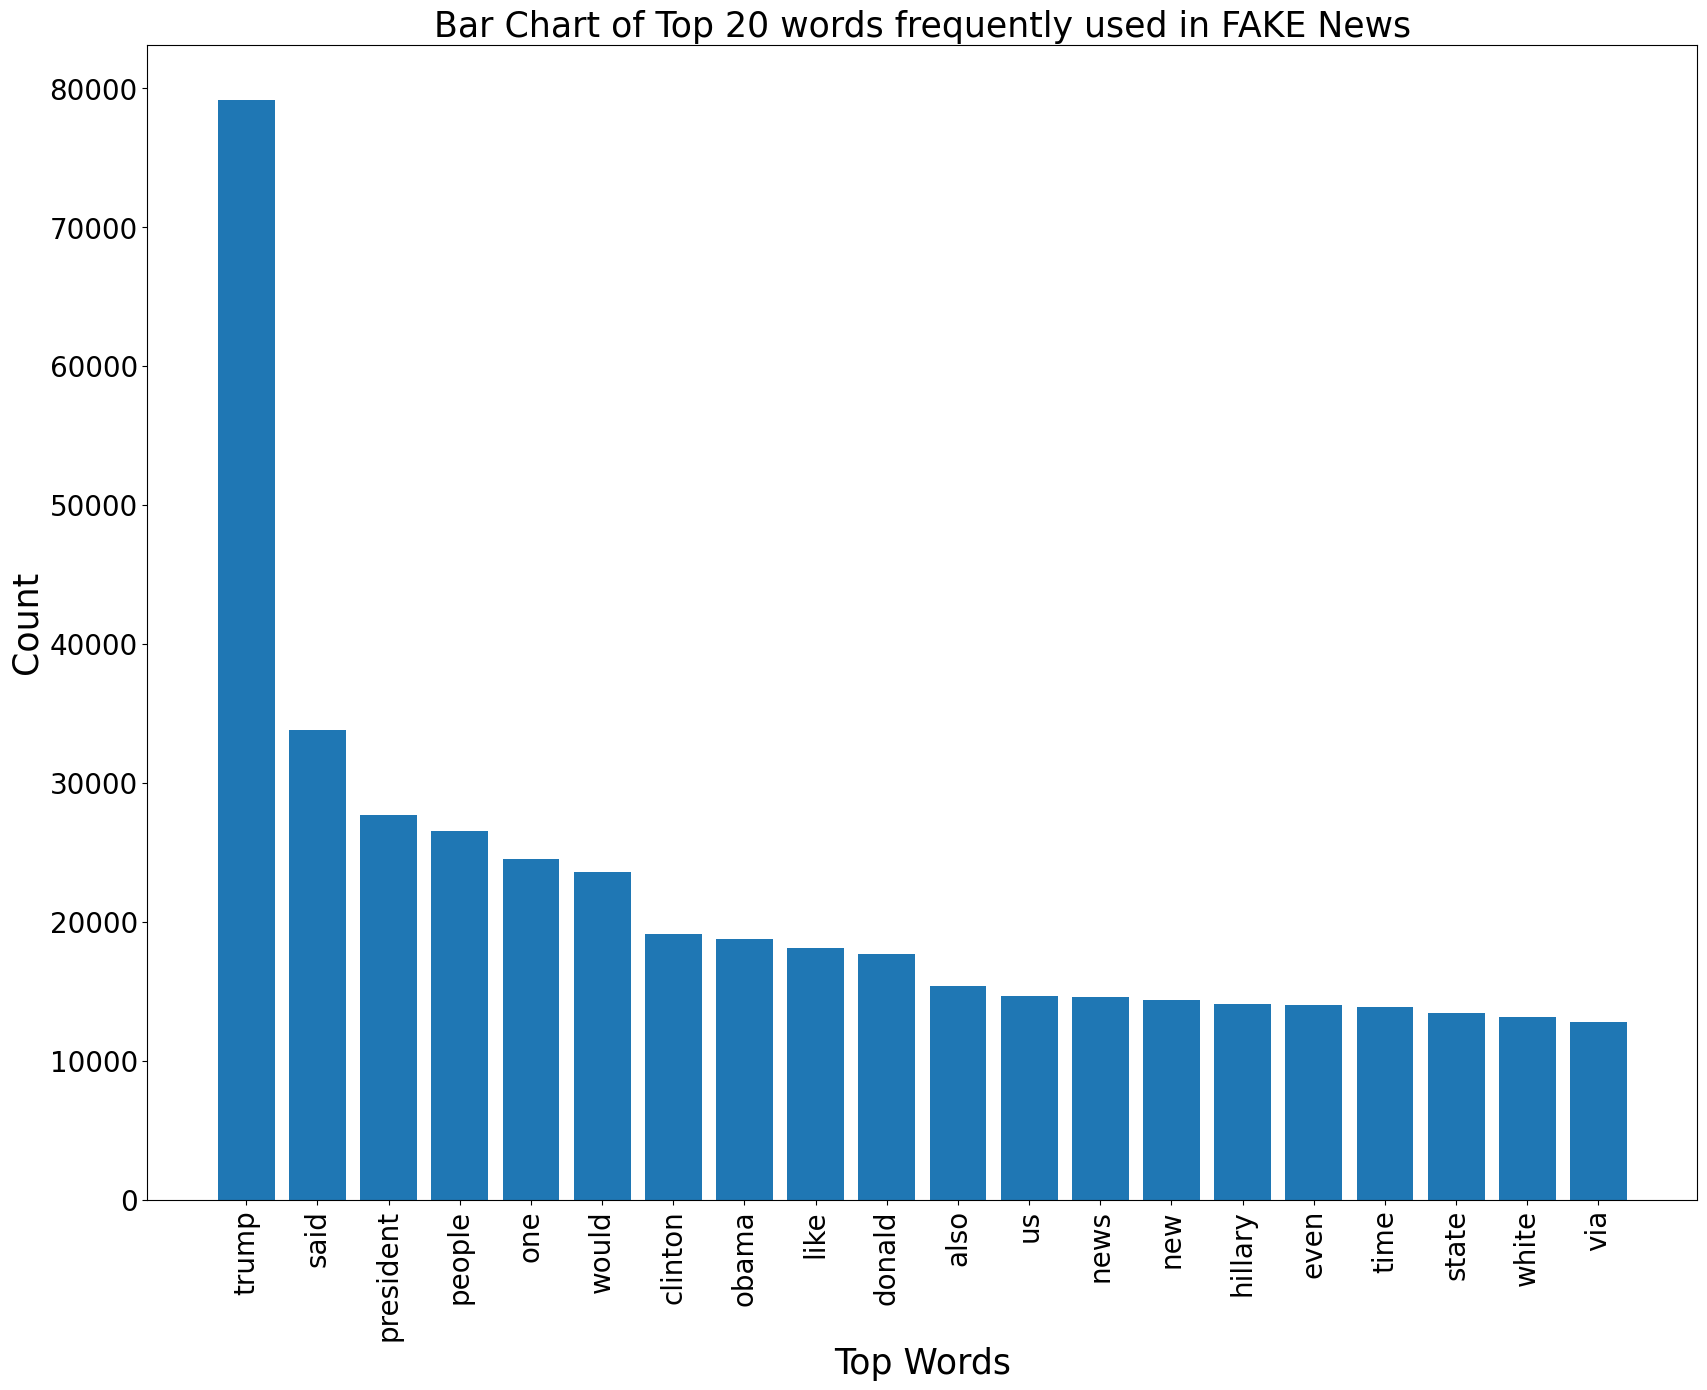

In [24]:
plt.figure(figsize = (20,15))
plt.bar(df1['Word'],df1['count'] )

plt.title("Bar Chart of Top 20 words frequently used in FAKE News",fontsize=25)

plt.xlabel("Top Words",fontsize=25) 
plt.ylabel("Count",fontsize=25) 

plt.xticks(fontsize=20,rotation=90)
plt.yticks(fontsize=20)

plt.show()

# 5. Merging fake and true news.

In [29]:
data_merge = pd.concat([data_fake, data_true], axis = 0)
data_merge.head(10)

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",0
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",0
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",0
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",0
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",0


In [30]:
data = data_merge.drop(['title', 'subject', 'date'], axis = 1)

In [31]:
# random shuffeling
data = data.sample(frac = 1)  # why frac = 1, sample belong to which class(type)

In [32]:
data.head(20)

,text,class
9978,Contrary to what the media would like us to be...,0
998,Donald Trump was in a room full of Irish repor...,0
479,"WASHINGTON (Reuters) - Steny Hoyer, the No. 2 ...",1
14178,The unborn person is how Clinton describes t...,0
14006,This video would be on a 24/7 mainstream media...,0
5866,In the wake of the horrific Orlando shooting t...,0
8916,It s no secret that Senator John McCain hates ...,0
9095,CHICAGO (Reuters) - Illinois’ long-running bud...,1
11692,,0
20171,PARIS (Reuters) - European Commission chief Je...,1


In [33]:
data.reset_index(inplace = True)
data.drop(['index'], axis = 1, inplace = True)  

In [34]:
data.head(20)

,text,class
0,Contrary to what the media would like us to be...,0
1,Donald Trump was in a room full of Irish repor...,0
2,"WASHINGTON (Reuters) - Steny Hoyer, the No. 2 ...",1
3,The unborn person is how Clinton describes t...,0
4,This video would be on a 24/7 mainstream media...,0
5,In the wake of the horrific Orlando shooting t...,0
6,It s no secret that Senator John McCain hates ...,0
7,CHICAGO (Reuters) - Illinois’ long-running bud...,1
8,,0
9,PARIS (Reuters) - European Commission chief Je...,1


# 6. Removing Unnecessary strings/characters from datasets¶

In [35]:
def wordopt(text):
    text = text.lower()
    text = re.sub("\[.*?\]", "",text)
    text = re.sub("\\W"," ",text)
    text = re.sub("https?://\S+|www\.\S+", "", text)
    text = re.sub("<.*?>+","",text)
    text = re.sub("[%s]" % re.escape(string.punctuation), "", text)
    text = re.sub("\n", "", text)
    text = re.sub("\w*\d\w*", "", text)
    return text

In [36]:
data["text"] = data["text"].apply(wordopt)

In [37]:
data

,text,class
0,contrary to what the media would like us to be...,0
1,donald trump was in a room full of irish repor...,0
2,washington reuters steny hoyer the no d...,1
3,the unborn person is how clinton describes t...,0
4,this video would be on a mainstream media lo...,0
...,...,...
44893,beirut reuters iran will treat a british i...,1
44894,in response to the establishment media s cont...,0
44895,islamabad reuters pakistan s ousted prime ...,1
44896,dubai reuters a saudi cleric who said wome...,1


In [41]:
data.iloc[2,2]

'washington  reuters    steny hoyer  the no   democrat in the u s  house of representatives  said on wednesday that democratic representative john conyers should resign if the sexual harassment allegations against him are found to be true   notwithstanding the credibility of the witnesses  we have a process to determine  were these allegations founded  and if they re founded  yes  he should resign   hoyer said in an interview with msnbc  '

In [39]:
data.to_csv('News123.csv')
data = pd.read_csv('News123.csv')
data

,Unnamed: 0.1,Unnamed: 0,text,class
0,0,0,contrary to what the media would like us to be...,0
1,1,1,donald trump was in a room full of irish repor...,0
2,2,2,washington reuters steny hoyer the no d...,1
3,3,3,the unborn person is how clinton describes t...,0
4,4,4,this video would be on a mainstream media lo...,0
...,...,...,...,...
44893,44893,44893,beirut reuters iran will treat a british i...,1
44894,44894,44894,in response to the establishment media s cont...,0
44895,44895,44895,islamabad reuters pakistan s ousted prime ...,1
44896,44896,44896,dubai reuters a saudi cleric who said wome...,1


# 7. Split data into features and labels¶

In [32]:
x = data["text"]
y = data["class"]

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.20, random_state = 51)

# 8.TfidfVectorizer¶

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer()
x_train = vectorization.fit_transform(x_train)
x_test = vectorization.transform(x_test)

# 9. LogisticRegression

In [35]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(x_train, y_train)

# Testing Model Accuracy
print("LR Test Accuracy : ",LR.score(x_test,y_test))



LR Test Accuracy :  0.9874164810690423


In [36]:
# LR predicted values
pred_lr = LR.predict(x_test)
pred_lr[0:10]


array([0, 0, 1, 0, 0, 0, 0, 1, 1, 0])

In [37]:
# actual values
y_test.head(10)

16160    0
28566    0
7742     1
41475    0
12705    0
38040    0
44440    0
33611    1
1978     1
40900    0
Name: class, dtype: int64

In [38]:
# Error in LR
from sklearn.metrics import mean_squared_error
import numpy as np
mse = mean_squared_error(y_test, pred_lr)
rmse = np.sqrt(mse)

print('MSE = ', mse)
print('\nRMSE = ', rmse)

MSE =  0.012583518930957684

RMSE =  0.11217628506488207


In [39]:
# Cross validation for LR
from sklearn.model_selection import cross_val_score
score_cv = cross_val_score(LR,x_test,y_test,cv = 5)
print(score_cv)
print("Average : ",np.average(score_cv))

[0.97884187 0.97828508 0.97939866 0.97939866 0.97605791]
Average :  0.9783964365256125


Text(50.722222222222214, 0.5, 'Predicted')

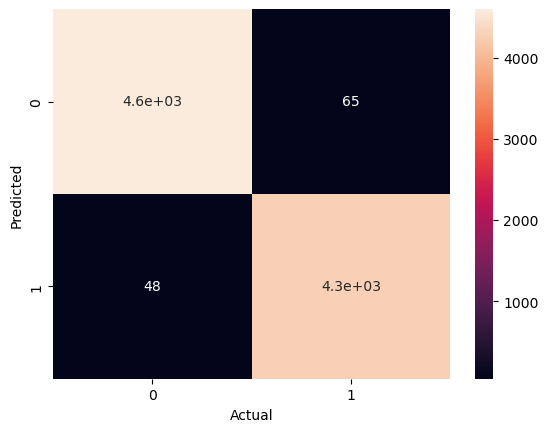

In [43]:
# Confusion Matrix for LR
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,pred_lr)
sns.heatmap(cm, annot = True)
plt.xlabel("Actual")
plt.ylabel("Predicted")

# 11. RandomForestClassifier

In [44]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(random_state = 31)
RF.fit(x_train,y_train)

# Testing Model Accuracy
print("RF Test Accuracy : ",RF.score(x_test,y_test))

RF Test Accuracy :  0.9919821826280624


In [45]:
# RF predicted values
pred_rf = RF.predict(x_test)
pred_rf[0:10]

array([0, 0, 1, 0, 0, 0, 0, 1, 1, 0])

In [46]:
# actual values
y_test.head(10)

16160    0
28566    0
7742     1
41475    0
12705    0
38040    0
44440    0
33611    1
1978     1
40900    0
Name: class, dtype: int64

In [47]:
# Error in RF
mse1 = mean_squared_error(y_test, pred_rf)
rmse1 = np.sqrt(mse1)

print('MSE = ', mse1)
print('\nRMSE = ', rmse1)

MSE =  0.008017817371937639

RMSE =  0.08954226584098506


In [48]:
# Cross validation for RF
from sklearn.model_selection import cross_val_score
score_cv = cross_val_score(RF,x_test,y_test,cv = 5)
print(score_cv)
print("Average : ",np.average(score_cv))

[0.98162584 0.97438753 0.97828508 0.97828508 0.97772829]
Average :  0.9780623608017815


Text(50.722222222222214, 0.5, 'Predicted')

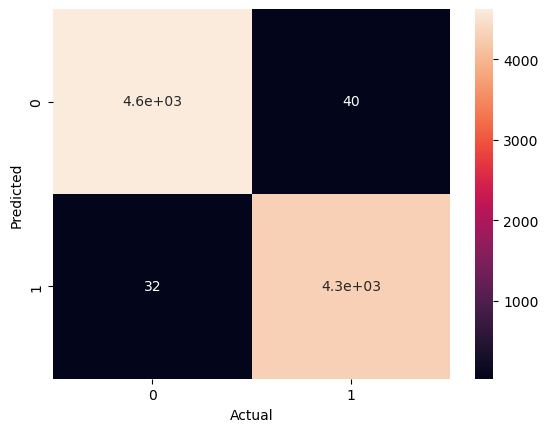

In [49]:
# Confusion Matrix for RF
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,pred_rf)
sns.heatmap(cm, annot = True)
plt.xlabel("Actual")
plt.ylabel("Predicted")

# 12. Deployment

In [50]:
def output_label(n):
    if n == 0:
        return "Fake News"
    elif n == 1:
        return "Real News"

def manual_testing(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(wordopt)
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    pred_LR = LR.predict(new_xv_test)
    pred_RF = RF.predict(new_xv_test)
    return print("\nLR Prediction : {}\nRF Prediction : {}"
                 .format(output_label(pred_LR[0]),output_label(pred_RF[0])))
        

In [ ]:
news = str(input())
manual_testing(news)

In [ ]:
Title :  France’s President Confirms He Intentionally Humiliated Trump With That Handshake .

It was the cringe-inducing handshake seen   and mocked   around the world. Trump sat down 
with the new president of France, reached out his hand, and this was the result.What made 
the situation that much more awkward for Trump is that he has a well-known, albeit bizarre,
habit of trying to humiliate others with his handshakes. Repeatedly, he has gone into a
handshake with a foreign leader only to yank their arms and pull them in. He s a 70-year-old 
who cannot do a simple handshake without making everyone uncomfortable.Macron was reportedly
warned ahead of time that Trump s handshakes were designed to be as awkward as possible. A 
Washington Post writer described the moment Macron s adviser was tipped off that an
embarrassing incident was coming: Did you warn him about Trump s handshakes?  
    my philanthropist friend asked. A look of surprise popped on Araud s face as he 
    inquired what exactly did that mean. Both of us told him about Trump s affinity for the
    alpha male, grab-and-pull power pump that always seemed to reduce the other person to a
    rag doll. Forewarned, Araud said he would alert Macron.So Macron came prepared. And the
    result was that the tables were completely turned on Trump.That was, according to Macron
    s own admission, by design. In a follow-up interview, Macron said he grasped onto Trump s
    hand with an iron grip with the intention of showing Trump he wasn t about to be made a
    fool of. My handshake with him, it wasn t innocent. He added:  One must show that you
        won t make small concessions, even symbolic ones, but also not over-publicise things,
        either. Macron s office confirmed the veracity of the president s comments in Le 
        Journal du Dimanche.He described the handshake seen  round the world as a  moment of
        truth  for Trump. The Republican president had come to bully his European allies  
        instead they, to a person, stood up to him. The handshake was a symbol of that 
        defiance.Macron might turn into the go-to guy for how to subvert Trump s outsized
        ego. In a later moment of pure trolling, he subtly put Trump in his place with this
        brutal greeting.  
        Bruxelles, unis avec nos alli s de @NATO. pic.twitter.com/7nyaoI8hki  Emmanuel 
        Macron (@EmmanuelMacron) May 25, 2017Vive la France!Featured image via YouTube 